In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [15]:
def euler(f, xs, y0):
    delta = xs[1] - xs[0] 
    y = np.empty_like(xs)
    y[0] = y0
    for i in range(1, len(xs)):
        y[i] = y[i-1] + f(xs[i-1], y[i-1])*delta
        print(xs[i-1], y[i-1], y[i])
    return y            

In [8]:
fdy = lambda x, y: x**2-y**2
x_100 = np.linspace(0, 0.6, 4)
x_10 = np.linspace(0, 0.6, 4)

0.0 1.0 0.8
0.2 0.8 0.68
0.4 0.68 0.61952


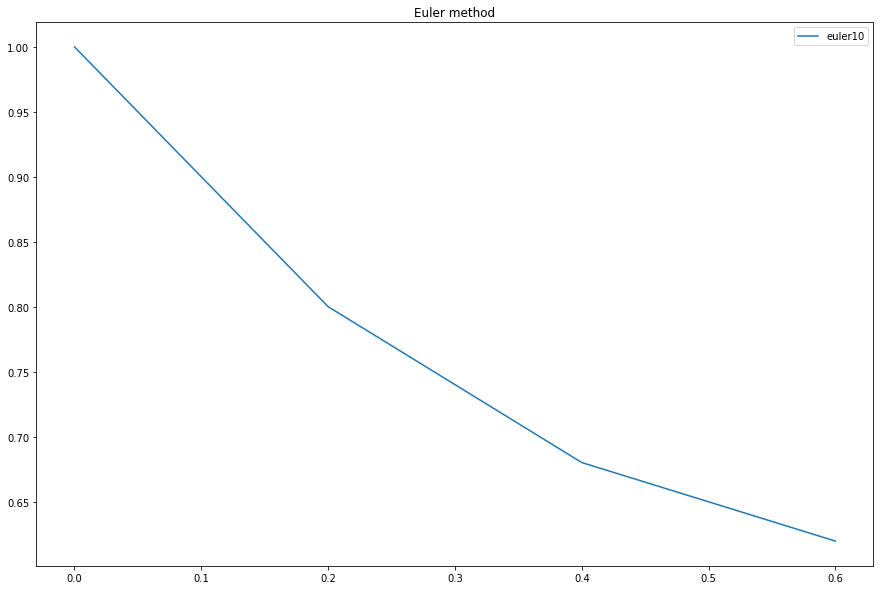

In [16]:
y_10 = euler(fdy, x_10, 1)
#y_100 = euler(fdy, x_100, 1)
y_solved = 3/4*np.e**(-2*x_100) +1/2*x_100**2-1/2*x_100+1/4


plt.figure(figsize=(15, 10))
#plt.plot(x_10, y_10, x_100, y_100, x_100, y_solved)
plt.plot(x_10, y_10)

plt.legend(['euler10', 'answer'], loc='best')
plt.title('Euler method')
plt.show()

In [16]:
def runge_kutta(f, xs, y0):
    delta = xs[1] - xs[0] 
    y = np.empty_like(xs)
    y[0] = y0
    for i in range(1, len(xs)):
        k1 = f(xs[i-1], y[i-1])
        k2 = f(xs[i-1] + delta/2, y[i-1] + k1*delta/2)
        k3 = f(xs[i-1] + delta/2, y[i-1] + k2*delta/2)
        k4 = f(xs[i-1] + delta, y[i-1] + k3*delta)
        y[i] = y[i-1]+delta/6*(k1+ 2*k2 + 2*k3 + k4)
    return y            

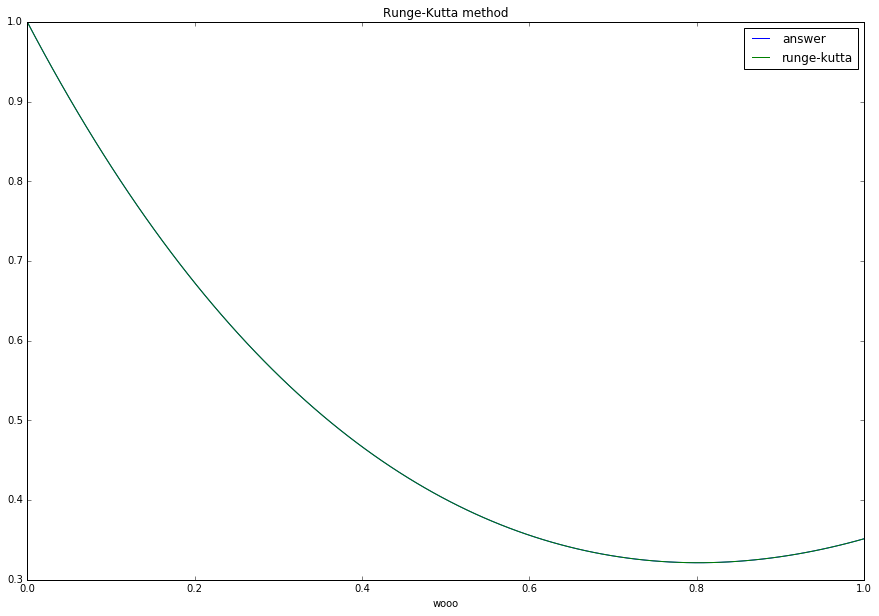

In [17]:
y_solved = 3/4*np.e**(-2*x_100)+1/2*x_100**2-1/2*x_100+1/4
y_runge = runge_kutta(fdy, x_100, 1)

plt.figure(figsize=(15, 10))
plt.plot(x_100, y_solved, x_100, y_runge)
plt.legend(['answer', 'runge-kutta'], loc='best')
plt.xlabel('wooo')
plt.title('Runge-Kutta method')
plt.show()

In [18]:
dy = lambda t, x, y: (2 - 1/3*y)*x
dx = lambda t, x, y: -y*1/4 + x*y
fs = [dy, dx]
t = np.linspace(0, 100, 1000)
y0 = np.array([1, 2])

In [19]:
def map_with_fs(fs, obj):
    return np.array([f(*obj) for f in fs])

In [20]:
def runge_kutta_sys(fs, x, y0):
    delta = x[1] - x[0]
    y = np.empty((len(x), len(y0)))
    y[0] = y0
    for i in range(1, len(x)):
        k1 = map_with_fs(fs, [x[i - 1], *y[i - 1]])
        k2 = map_with_fs(fs, [x[i - 1] + delta/2, *(y[i - 1] + delta*k1/2)])
        k3 = map_with_fs(fs, [x[i - 1] + delta/2, *(y[i - 1] + delta*k2/2)])
        k4 = map_with_fs(fs, [x[i - 1] + delta, *(y[i - 1] + delta*k3)])
        y[i] = y[i - 1] + delta / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

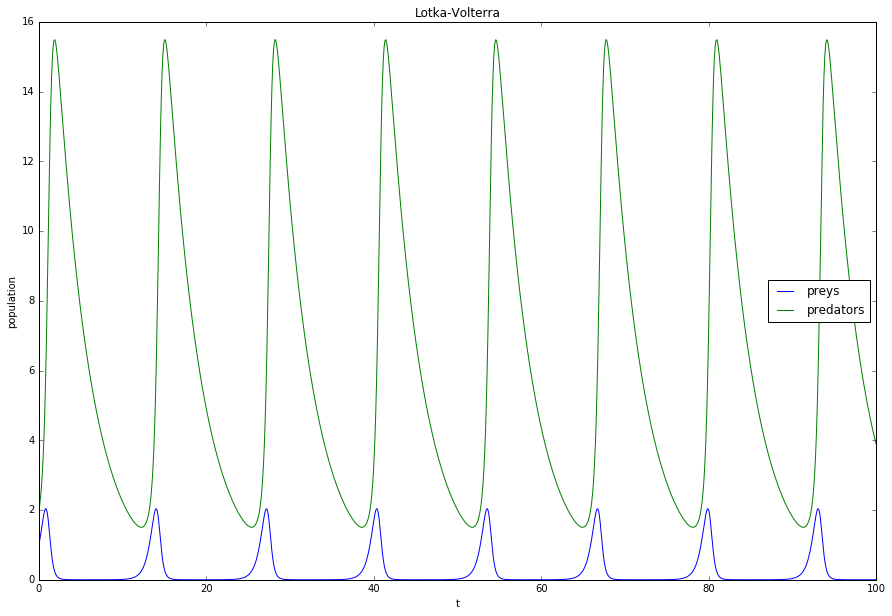

In [21]:
z = runge_kutta_sys(fs, t, y0)
plt.figure(figsize=(15, 10))
plt.plot(t, z[:, 0], t, z[:, 1])
plt.legend(['preys', 'predators'], loc='best')
plt.xlabel('t')
plt.ylabel('population')
plt.title('Lotka-Volterra')
plt.show()

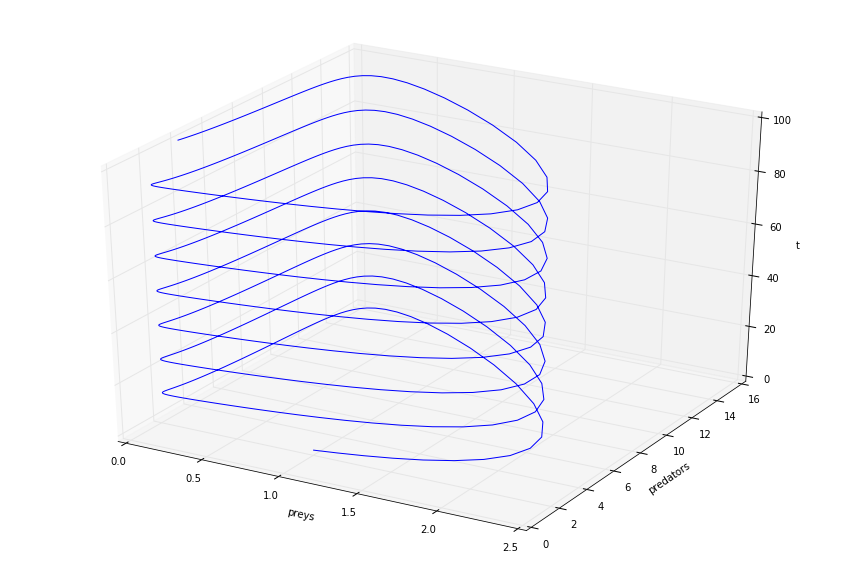

In [22]:
fig = plt.figure(figsize=(15, 10))
plt.legend(['preys'], loc='best')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('preys')
ax.set_zlabel('t')
ax.set_ylabel('predators')
ax.plot_wireframe(z[:,0], z[:,1], t)

plt.show() 